In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


The individual dataset was tranformed ,concatenated and  saved in a csv file using R

In [2]:
df=pd.read_csv('dataset.csv')


In [3]:
df.columns

Index(['Unnamed: 0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V38.4', 'V39.4', 'V40.4', 'V41.4', 'V42.4', 'V43.4', 'V44.4', 'V45.4',
       'V46.4', 'V47.4'],
      dtype='object', length=650)

In [4]:
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V38.4,V39.4,V40.4,V41.4,V42.4,V43.4,V44.4,V45.4,V46.4,V47.4
0,98,236,531,673,607,647,2,9,3,6,...,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,121,193,607,611,585,665,7,9,2,4,...,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,115,141,590,605,557,627,12,6,3,3,...,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,90,122,627,692,607,642,0,6,4,5,...,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,157,167,681,666,587,666,8,6,1,4,...,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513


In [6]:
df.shape

(2000, 649)

##### Using Principal component analysis from scratch in a function

In [7]:
def PCA(df,components):
    data_S=(df-df.mean(axis=0))/df.std()
#     covmat=np.cov(data_S,rowvar=False)
    covmat=df.corr()    
    eig_values,eigen_vectors=np.linalg.eigh(covmat)
    sort=np.argsort(eig_values)[::-1]
    eigen_values_sort=eig_values[sort]
    eigen_vectors_sort=eigen_vectors[sort]
    eigen_vectors_subset=eigen_vectors_sort[:,0:components]
    X=np.dot(eigen_vectors_subset.T,data_S.T).T
    x=pd.DataFrame(X,columns=['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10'])
    return x

In [8]:
data=PCA(df,10)

In [9]:
data.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,-0.633707,2.647794,-1.248098,0.340447,-0.142704,-0.399187,0.352395,-0.718902,-0.173386,-1.911213
1,-0.435620,1.296783,0.078319,0.303610,-0.393997,0.316120,0.944201,-0.657752,-0.668356,-1.413744
2,-1.063469,1.818038,-0.763931,0.360566,0.667870,-0.219471,0.845274,-0.159341,-0.021901,-1.638963
3,0.383447,0.794018,0.051139,0.371575,1.423910,-0.140463,0.836379,-0.050656,0.043493,-0.931085
4,0.459970,1.791906,-1.596258,0.336982,-0.093551,-0.246558,0.991430,-0.556813,0.007574,-1.237289


<Figure size 1440x576 with 0 Axes>

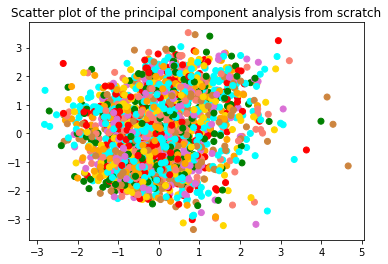

<Figure size 1440x576 with 0 Axes>

In [10]:
plt.scatter(data.v9,data.v10,c=['peru', 'red', 'green', 'salmon', 'cyan','gold','orange','aqua','orchid'])
plt.title('Scatter plot of the principal component analysis from scratch')
plt.figure(figsize=[20,8])

##### Perfoming Linear discriminant analysis using generated target values,the class are from 1 to 10

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
LDA=LinearDiscriminantAnalysis(solver='svd')

In [13]:
class_0=pd.Series(np.ones(200)*1)
class_1=pd.Series(np.ones(200)*2)
class_2=pd.Series(np.ones(200)*3)
class_3=pd.Series(np.ones(200)*4)
class_4=pd.Series(np.ones(200)*5)
class_5=pd.Series(np.ones(200)*6)
class_6=pd.Series(np.ones(200)*7)
class_7=pd.Series(np.ones(200)*8)
class_8=pd.Series(np.ones(200)*9)
class_9=pd.Series(np.ones(200)*10)


In [14]:
# generated target value
y=pd.concat([class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9])

In [15]:
p=LDA.fit_transform(df,y)

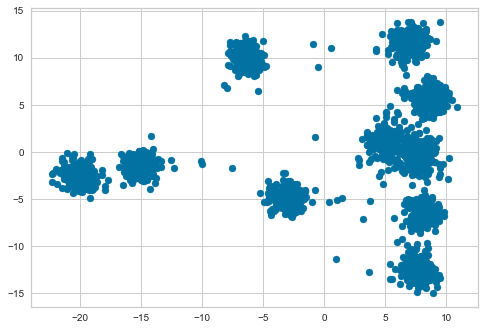

In [57]:
plt.scatter(p[:,0], p[:,1])

The scatterplot generated above shows the different clusters of the dataset.And here we can see that we have 9 clusters with a few outliers

We also standardadized the dataset and apply in the PCA model to transform the data dimensionally whiles retaining all the information in the dataset.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
s=StandardScaler()
scaled=s.fit(df)

In [19]:
scaled_=s.transform(df)

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
dt=pca.fit_transform(scaled_)

In [21]:
scaled

StandardScaler()

Text(0.5,1,'PCA usng the sklearn library')

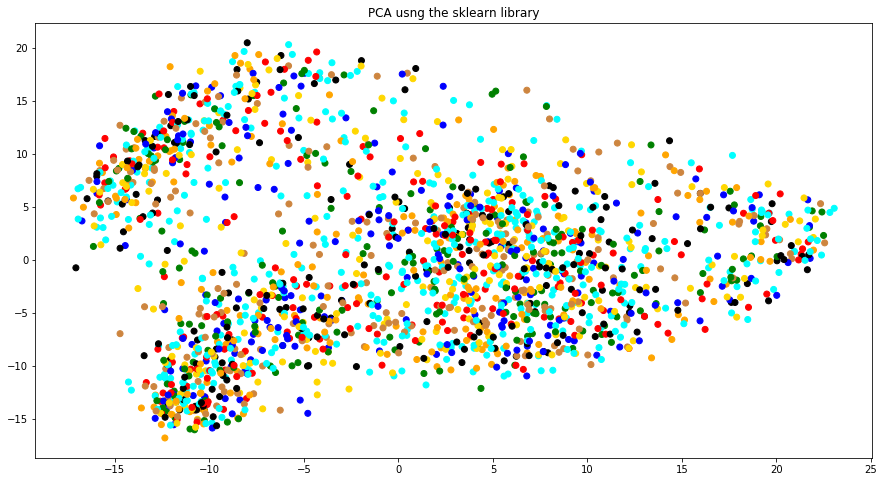

In [22]:
plt.figure(figsize=[15,8])
plt.scatter(dt[:,0], dt[:,1],c=['peru', 'red', 'green', 'blue', 'cyan','gold','orange','aqua','black'])
plt.title('PCA usng the sklearn library')

From this scatter plot we can see that the clustering in this data is not quite interpretable and so we apply other methods to futher get good results.

# The code below normalizes the data and plots the graph,using the min max scalar

In [23]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)
def plot_clustering(data, labels, title=None):
    x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(1, figsize=(4, 3))
    plt.figure(figsize=(6, 4))
    plt.scatter(data[:, 0], data[:, 1],
                 c=labels.astype(np.float))
    plt.xticks([])
    plt.yticks([])
    plt.title('Kmeans plot for unsupervised data', size=17)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


with the scatter plot below we can clearly see that a batter cluster even though not that good has being made better than our previous graph.

<Figure size 288x216 with 0 Axes>

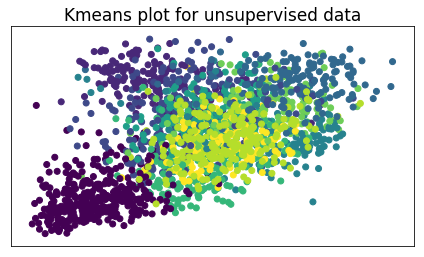

In [24]:
 from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(data_transformed)
labels = kmeans.labels_
plot_clustering(data_transformed, labels)


# The code below normalizes the data and plots the graph,using the standard scalar before PCA

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
s=StandardScaler()
s.fit(df)
df_transformed = s.transform(df)
pca=PCA(n_components=10)
dt=pca.fit_transform(df_transformed)
def plot_clustering(data, labels, title=None):
    x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(1, figsize=(4, 3))
    plt.figure(figsize=(6, 4))
    plt.scatter(data[:, 0], data[:, 1],  c=labels.astype(np.float))
    plt.xticks([])
    plt.yticks([])
    plt.title('Kmeans plot for unsupervised data', size=17)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<Figure size 288x216 with 0 Axes>

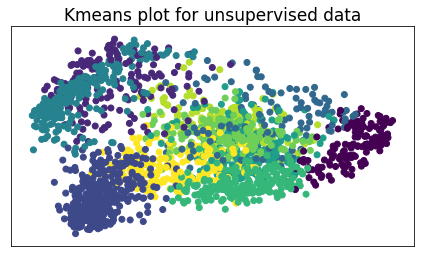

In [26]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(dt)
labels = kmeans.labels_
plot_clustering(dt, labels)


Evaluating dataset with Elbow method,after standardizing ,doing pca and applying it in the model.Aplot of the squared differences is made to determine the which of the components to consider.

Text(0.5,1,'Elbow Method For Optimal k')

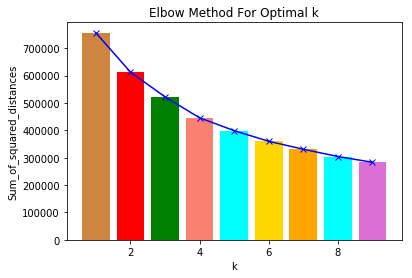

In [27]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dt)
    Sum_of_squared_distances.append(km.inertia_)
plt.bar(K, Sum_of_squared_distances,color=['peru', 'red', 'green', 'salmon', 'cyan','gold','orange','aqua','orchid'])
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')


The Elbow method is used to futher give details on components to be considered.

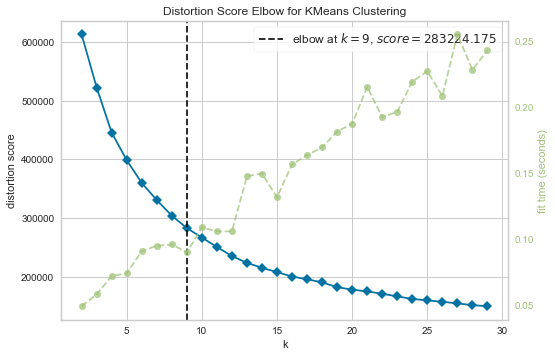

In [28]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(km, k=(2,30), timings= True)
visualizer.fit(dt)        
visualizer.show() 

In [29]:
#df=pd.read_csv('mfeat-fac',sep='\s+',header=None,names=['x'+str(i) for i in range(47)])

I applied the agglomerative clustering which is an example of a heirachical clustering.And also made a plot of the dendogram using the the ward linkage.PCA was performed on the dataset before putting it to the model.  
Also a scatter plot was created to show the distribution of the data.

# Agglomerative Clustering

Text(0.5,1,'Agglomerative Dendrogram of the transformed PCA Data')

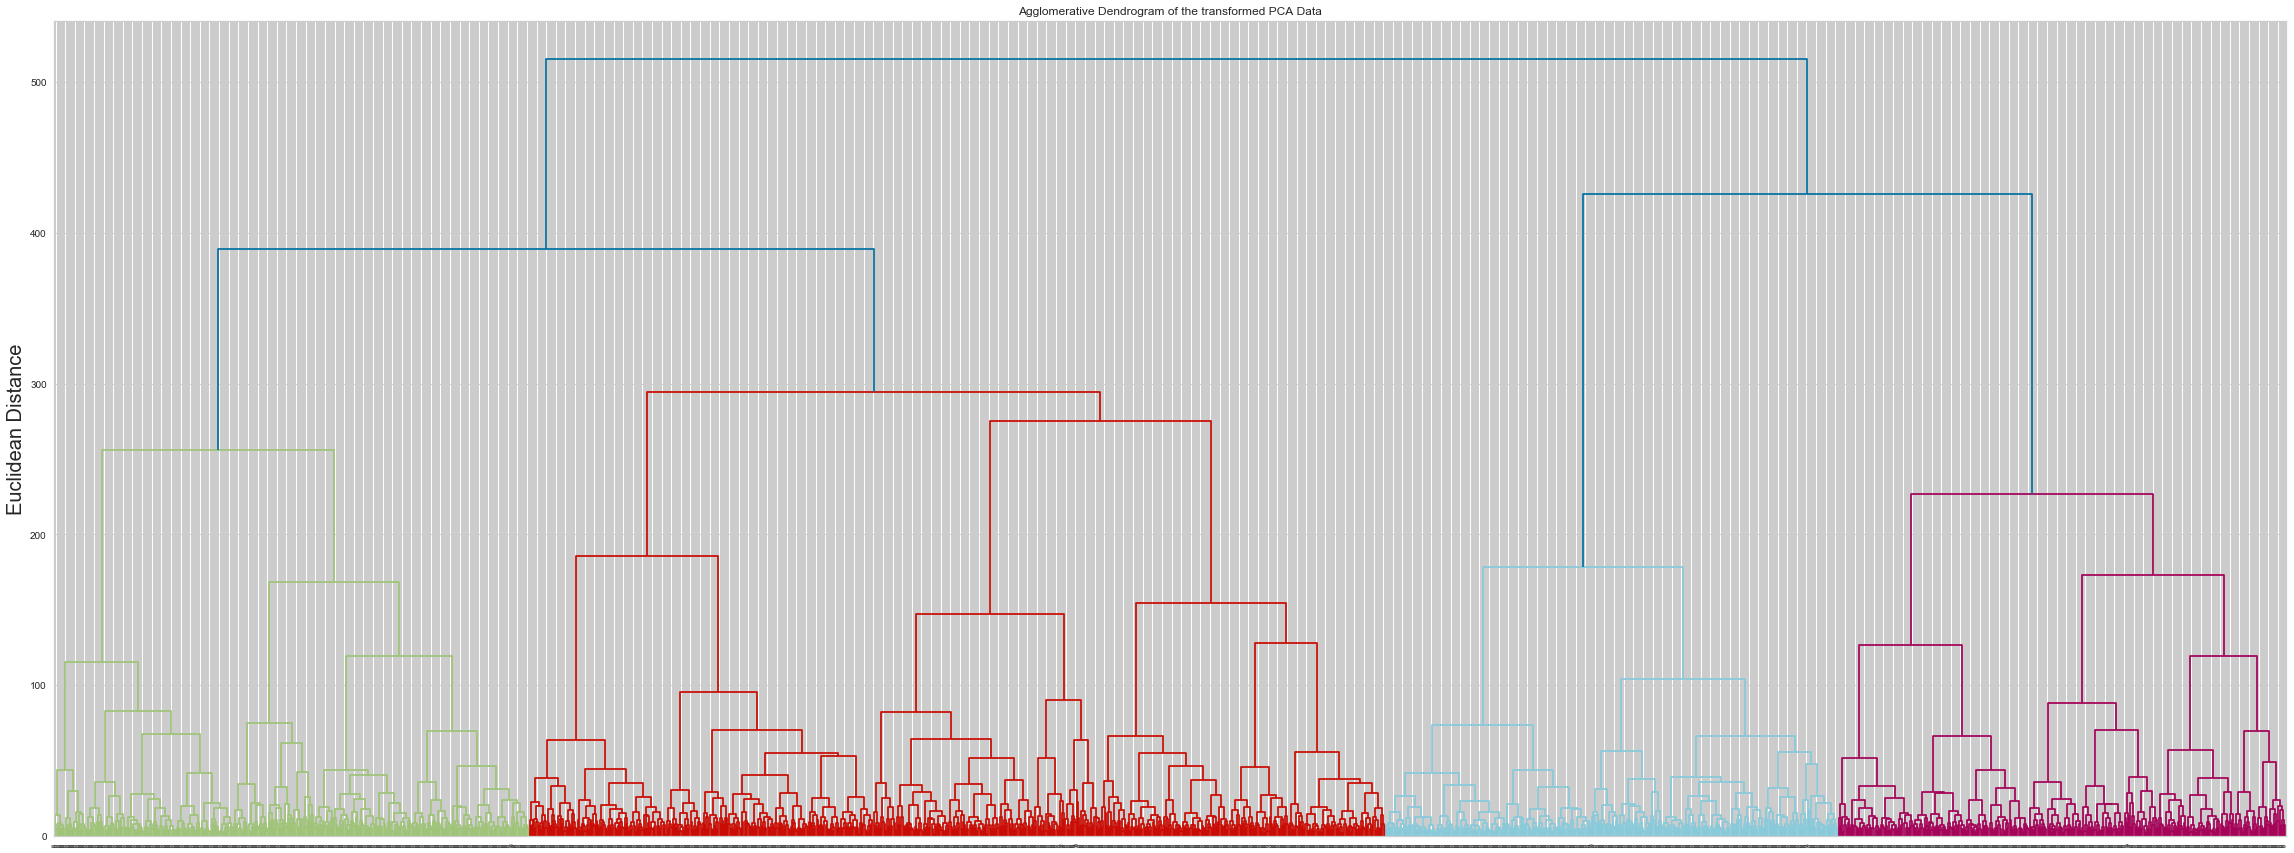

In [68]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
aglo = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='single')
aglo.fit(dt)
plt.figure(figsize=[40, 15])
den = dendrogram(linkage(dt, method='ward'), labels = aglo.labels_,p=3)
plt.ylabel('Euclidean Distance', fontsize = 20)
plt.title('Agglomerative Dendrogram of the transformed PCA Data')


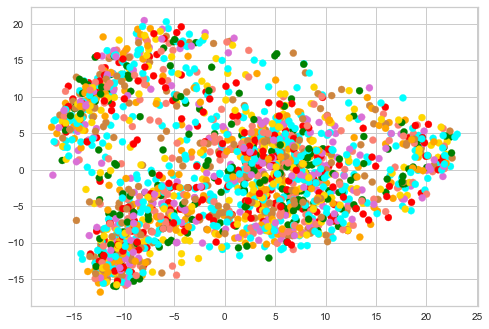

In [31]:
plt.scatter(dt[:,0],dt[:,1],color=['peru', 'red', 'green', 'salmon', 'cyan','gold','orange','aqua','orchid'])

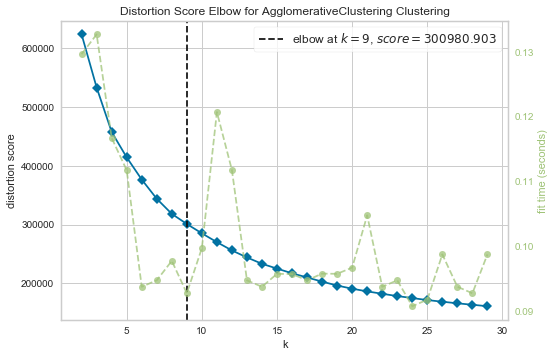

In [33]:

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(aglo, k=(2,30), timings= True)
visualizer.fit(dt)        
visualizer.show() 

The mfeat-px dataset is singled out and visualized to see the particular digits data we are working on.

#####  for PIX dataframe

In [35]:
df1=pd.read_csv('pix.csv')

In [59]:
df1.drop("Unnamed: 0", axis = 1, inplace = True)

In [60]:
df1.shape

(2000, 240)

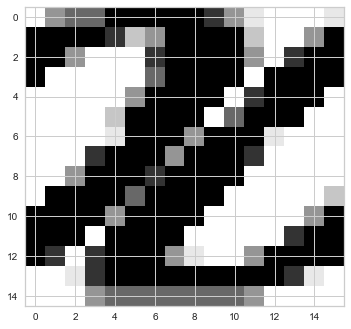

In [61]:
pix = df1.values.reshape(2000, 15, 16)


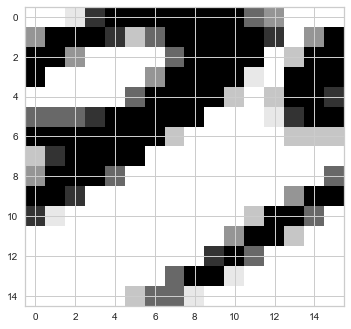

In [66]:
plt.imshow(pix[1999])

In [42]:
# s1=StandardScaler()
# scale=s1.fit(df1)
# scale1=s.transform(df)
# pca=PCA(n_components=10)
# dt1=pca.fit_transform(scale1)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
s1=StandardScaler()
s1.fit(df1)
df_t = s1.transform(df1)
pca=PCA(n_components=10)
dt1=pca.fit_transform(df_t)
def plot_clustering(data, labels, title=None):
    x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(1, figsize=(4, 3))
    plt.figure(figsize=(6, 4))
    plt.scatter(data[:, 0], data[:, 1],  c=labels.astype(np.float))
    plt.xticks([])
    plt.yticks([])
    plt.title('Kmeans plot for unsupervised data', size=17)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<Figure size 288x216 with 0 Axes>

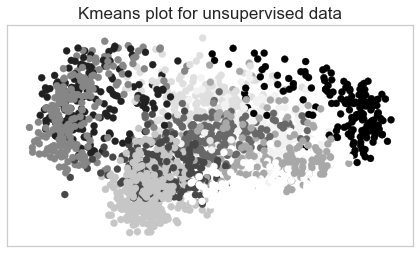

In [44]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(dt1)
labels1 = kmeans.labels_
plot_clustering(dt1, labels1)

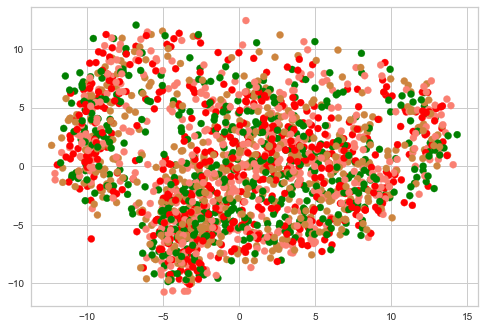

In [45]:
plt.scatter(dt1[:,0],dt1[:,1],color=['peru', 'red', 'green', 'salmon'])

Text(0.5,1,'Agglomerative Dendrogram of the transformed PCA Data')

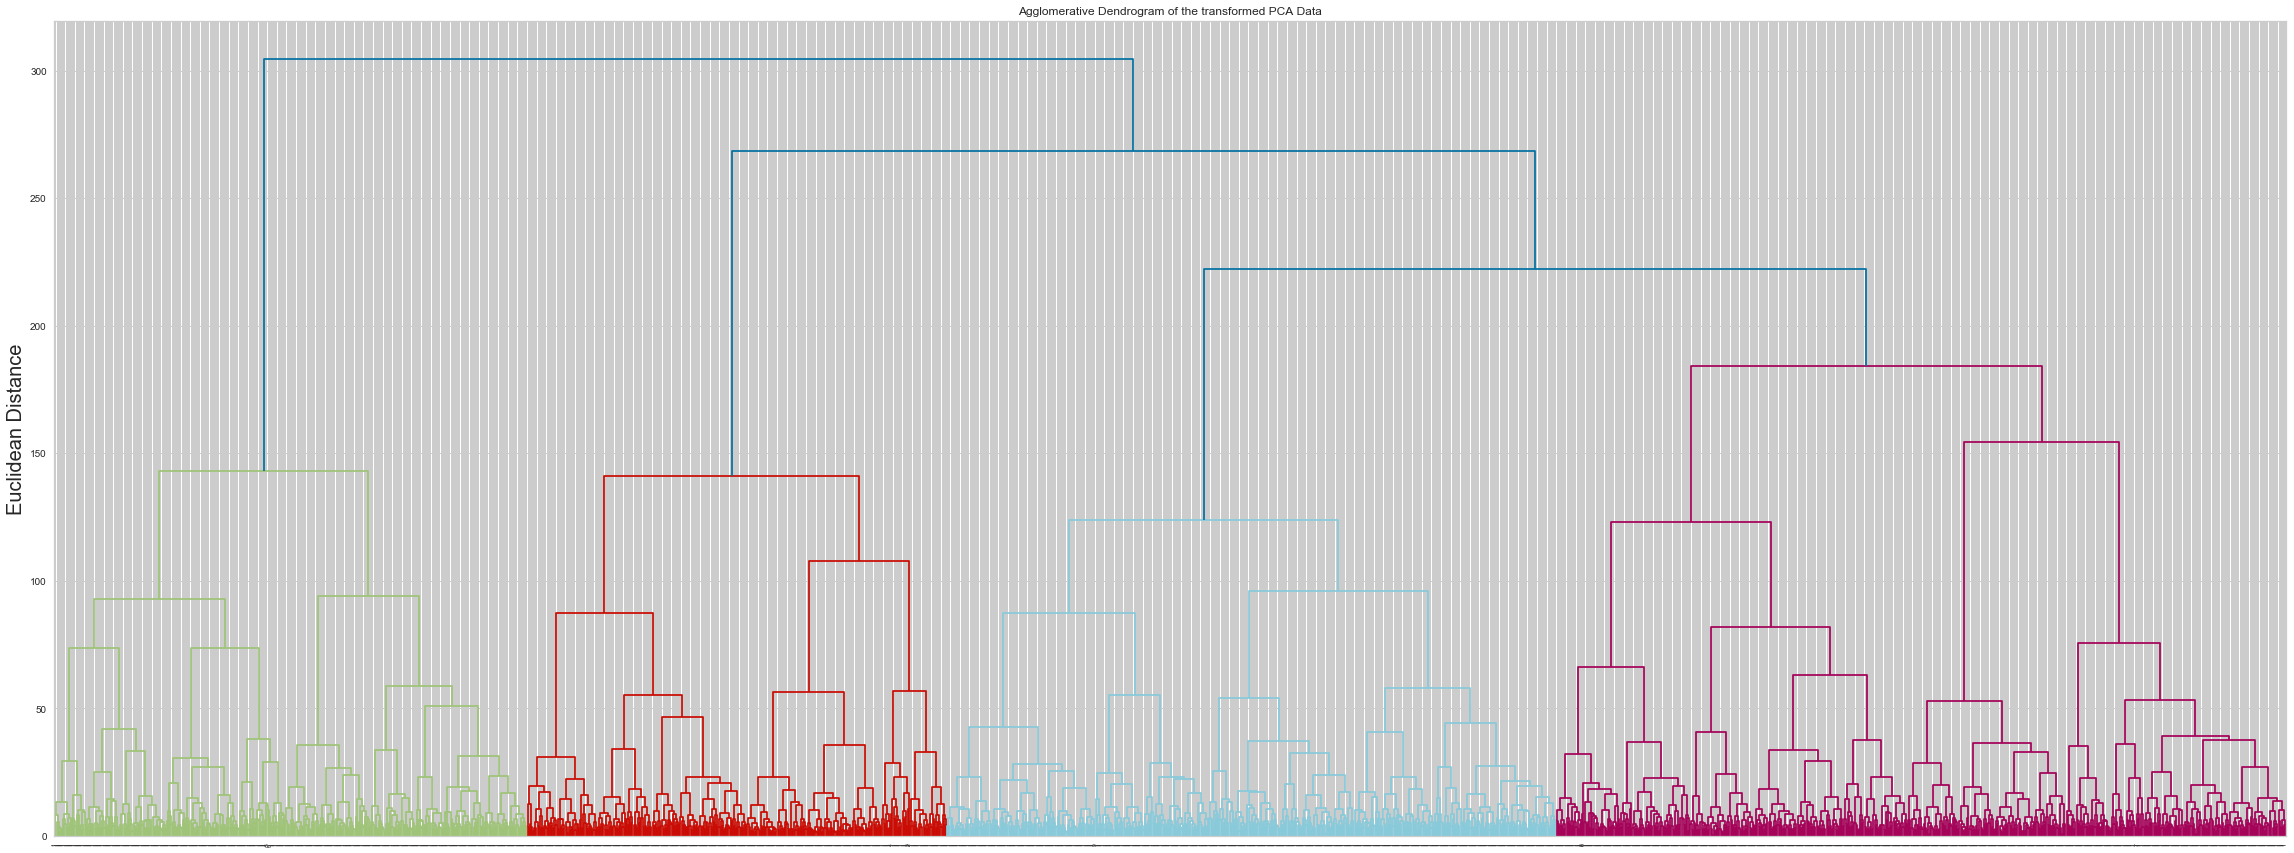

In [51]:
aglo1 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='single')
aglo1.fit(dt1)
plt.figure(figsize=[40, 15])
den1 = dendrogram(linkage(dt1[:,:], method='ward'), labels = aglo1.labels_)
plt.ylabel('Euclidean Distance', fontsize = 20)
plt.title('Agglomerative Dendrogram of the transformed PCA Data')


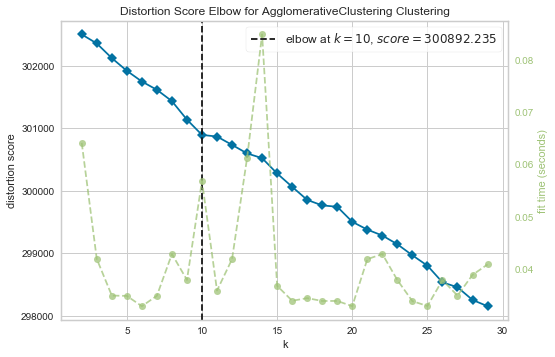

In [49]:
visualizer = KElbowVisualizer(aglo1, k=(2,30), timings= True)
visualizer.fit(dt1)        
visualizer.show() 

#### Conclusion

In all the methods performed the Kmeans model gave a better results.Ando so with futher exploration we would get better clusters from there.